In [12]:
#引入所需要的库
import numpy as np
import matplotlib.pyplot as plt

## 标准化

In [3]:
def deal_with1(data, datac):
    d = data[:,:-1]
    avg = sum(d)/len(d)
    s = np.sqrt(sum((d - avg)*(d - avg))/len(d))
    return (datac-avg)/s

def deal_with2(data, datac):
    d = data[:,:-1]
    min = np.min(d, axis=0)
    max = np.max(d, axis=0)
    return (datac-min)/(max-min)

## 逻辑回归

In [9]:
def logic(data, test, lerning, count):
    s = np.mat(np.ones(np.size(data, 1)))
    dataf,datac = np.mat(data[:,:-1]),np.mat(data[:,-1])
    dataf = np.insert(dataf, np.size(dataf, 1),
            values=np.ones(np.size(dataf, 0)), axis=1)
    for i in range(count):
        he = (datac - 1/np.array(1+np.exp(-s*dataf.T)))*dataf
        s = s + lerning*he
    test = np.insert(test, np.size(test, 1), values=np.ones(np.size(test, 0)), axis=1)
    return sum((s*test.T)>0)


## KNN

In [17]:
def knn_forecast(data, test, k):
    y = list()
    for i in test:
        x = (data[:,:-1] - i)**2
        x = np.sum(x, axis=1)
        x = np.array([x,data[:,-1]])
        x = x[:,x[0,:].argsort()]
        y.append(sum(x[1,:k]))
    return sum(np.mat(y)>k/2)

## 贝叶斯

In [21]:
def Make_model(data):
    clas = np.unique(data[:,-1])
    zb = dict()
    for i in clas:
        datai = data[data[:,-1]==i]
        avgi = sum(datai[:,:-1])/len(datai)
        zb[i] ={
            'avg': avgi,
            'f': np.array(np.mat(datai[:,:-1]-avgi).T
                *np.mat(datai[:,:-1]-avgi))/len(datai),
            'num': len(datai)/len(data) 
        }

    return zb
    
def bysyc(data, test):
    bys = Make_model(data)
    jg = dict()
    for i in bys.keys():  
        p = list()
        for x in test:
            px = 1/(2*np.pi*np.linalg.det(bys[i]['f']))*np.exp(-0.5
                *np.mat(x-bys[i]['avg'])*np.linalg.inv(bys[i]['f'])
                *np.mat(x-bys[i]['avg']).T)
            p.append(float(px*bys[i]['num']))
        jg[i] = np.array(p)
    
    return sum(np.mat(jg[0.0]-jg[1.0])<0)

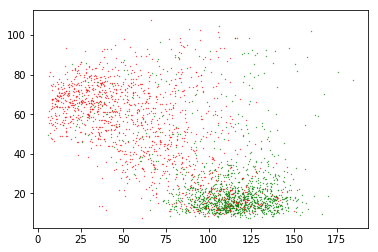

In [15]:
data = np.loadtxt('HTRU_2_train.csv', delimiter=',') #加载数据
data = data[data[:,-1].argsort()] #排序
data0 = data[data[:,-1]==0]
data1 = data[data[:,-1]==1]
#绘制出数据的分布
plt.scatter(data0[:,0], data0[:,1], c='g', s=0.1)
plt.scatter(data1[:,0], data1[:,1], c='r', s=0.1)
plt.show()

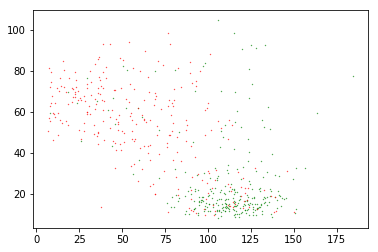

In [14]:
#划分出4/5的训练集和1/5测试集
index = np.arange(len(data))
train = data[index[index%5!=0]]
test = data[index[index%5==0]]

test0 = test[test[:,-1]==0]
test1 = test[test[:,-1]==1]
#绘制出测试集的分布
plt.scatter(test0[:,0], test0[:,1], c='g', s=0.1)
plt.scatter(test1[:,0], test1[:,1], c='r', s=0.1)
plt.show()

d:\python\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


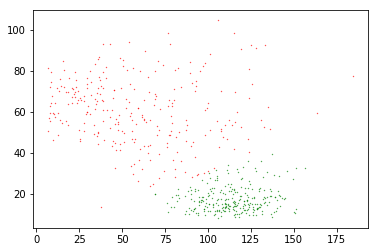

In [13]:
#使用逻辑回归模型
test = data[index[index%5==0]]

log = logic(data, test[:,:-1],0.001, 100)   #逻辑回归来进行预测
test = np.insert(test, np.size(test, 1), values=log, axis=1)
test0 = test[test[:,-1]==0]
test1 = test[test[:,-1]==1]
#绘制出预测的结果及其分布
plt.scatter(test0[:,0], test0[:,1], c='g', s=0.1)
plt.scatter(test1[:,0], test1[:,1], c='r', s=0.1)
plt.show()

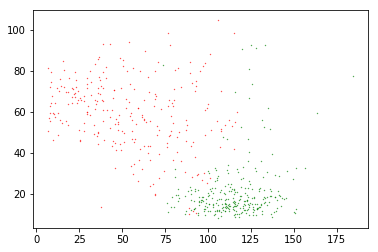

In [20]:
#使用KNN模型
test = data[index[index%5==0]]

knn = knn_forecast(data, test[:,:-1], 11)   #逻辑回归来进行预测
test = np.insert(test, np.size(test, 1), values=knn, axis=1)
test0 = test[test[:,-1]==0]
test1 = test[test[:,-1]==1]
#绘制出预测的结果及其分布
plt.scatter(test0[:,0], test0[:,1], c='g', s=0.1)
plt.scatter(test1[:,0], test1[:,1], c='r', s=0.1)
plt.show()

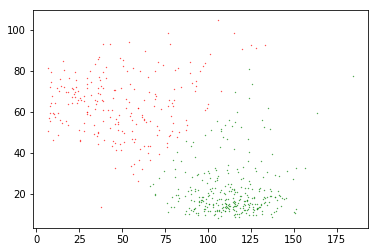

In [23]:
#使用贝叶斯模型
test = data[index[index%5==0]]

bys = bysyc(data, test[:,:-1])   #逻辑回归来进行预测
test = np.insert(test, np.size(test, 1), values=bys, axis=1)
test0 = test[test[:,-1]==0]
test1 = test[test[:,-1]==1]
#绘制出预测的结果及其分布
plt.scatter(test0[:,0], test0[:,1], c='g', s=0.1)
plt.scatter(test1[:,0], test1[:,1], c='r', s=0.1)
plt.show()

In [25]:
#将数据等分成五份
data = np.loadtxt('HTRU_2_train.csv', delimiter=',')
data = data[data[:,-1].argsort()]

num = len(data)
trains = list()
tests = list()
zong = set(range(num))
for i in range(5):
    t = set(range(i, num, 5))
    c = zong-t
    tests.append(data[list(t)])
    trains.append(data[list(c)])


In [26]:
#knn交叉验证选取值
p = list()
for i in range(3,15):
    z = list()
    for j in range(5):
        knn = knn_forecast(trains[j], tests[j][:,:-1], i)
        yc = np.array(knn-tests[j][:,-1])
        z.append(len(yc[yc==0])/len(tests[j]))
    p.append(z)
print(p)


[[0.8097928436911488, 0.8135593220338984, 0.8245283018867925, 0.8301886792452831, 0.7528301886792453], [0.8135593220338984, 0.8267419962335216, 0.839622641509434, 0.8226415094339623, 0.7735849056603774], [0.8135593220338984, 0.8455743879472694, 0.8377358490566038, 0.8509433962264151, 0.8018867924528302], [0.815442561205273, 0.8549905838041432, 0.8547169811320755, 0.8509433962264151, 0.8056603773584906], [0.8173258003766478, 0.8493408662900188, 0.8547169811320755, 0.8547169811320755, 0.8037735849056604], [0.8267419962335216, 0.8512241054613936, 0.8547169811320755, 0.8584905660377359, 0.8150943396226416], [0.8305084745762712, 0.8493408662900188, 0.8547169811320755, 0.8584905660377359, 0.8132075471698114], [0.8248587570621468, 0.8493408662900188, 0.8566037735849057, 0.8603773584905661, 0.8113207547169812], [0.8342749529190208, 0.8549905838041432, 0.8547169811320755, 0.8584905660377359, 0.8188679245283019], [0.8305084745762712, 0.8493408662900188, 0.8603773584905661, 0.8584905660377359, 0.

In [49]:
#对贝叶斯模型进行5轮交叉验证
for i in range(5):
    bys = bysyc(trains[j], tests[j][:,:-1])
    yc = np.array(bys-tests[j][:,-1])
    print(len(yc[yc==0])/len(tests[j]))

0.7924528301886793
0.7924528301886793
0.7924528301886793
0.7924528301886793
0.7924528301886793
